In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df =pd.read_csv("Embark.csv",parse_dates=['Date']).fillna(0).drop('Total',axis=1)

In [30]:
display(df)

,Date,Boston,New York,Hampton Roads,Charleston,New Orleans,Los Angeles,San Francisco,Seattle
0,1941-12-01,0,605,0,0,1084,0,1195,1583
1,1942-01-01,0,9787,0,0,1376,0,697,99
2,1942-02-01,0,108,0,0,2201,0,13,753
3,1942-03-01,1349,6082,0,0,1449,0,2763,427
4,1942-04-01,0,377,0,0,1588,0,2195,513
5,1942-05-01,11,5266,0,0,3464,0,1574,727
6,1942-06-01,416,1979,0,1,2138,0,3302,346
7,1942-07-01,236,5444,0,0,830,0,1299,428
8,1942-08-01,3837,2354,761,0,159,285,1180,860
9,1942-09-01,99,5114,2185,4,104,9,2681,1911


In [31]:
df.dtypes

Date             datetime64[ns]
Boston                    int64
New York                  int64
Hampton Roads             int64
Charleston                int64
New Orleans               int64
Los Angeles               int64
San Francisco             int64
Seattle                   int64
dtype: object

In [34]:
dfl = pd.melt(df,id_vars='Date',var_name='City')

In [35]:
dfl

,Date,City,value
0,1941-12-01,Boston,0
1,1942-01-01,Boston,0
2,1942-02-01,Boston,0
3,1942-03-01,Boston,1349
4,1942-04-01,Boston,0
...,...,...,...
355,1945-04-01,Seattle,6151
356,1945-05-01,Seattle,2612
357,1945-06-01,Seattle,2387
358,1945-07-01,Seattle,5244


City  Boston  Charleston  Hampton Roads  Los Angeles  New Orleans  New York   
Year                                                                          
1941       0           0              0            0         1084       605  \
1942   14620         479           5853          348        17238     42039   
1943   47329        1312          80755         7109        30790    170104   
1944   83382       31412         141379        33271        41778    250790   
1945  275519       45707         256955        32148        19954    696513   

City  San Francisco  Seattle  
Year                          
1941           1195     1583  
1942          24863    10762  
1943         104499    48424  
1944         184282   115020  
1945         188966    50705  


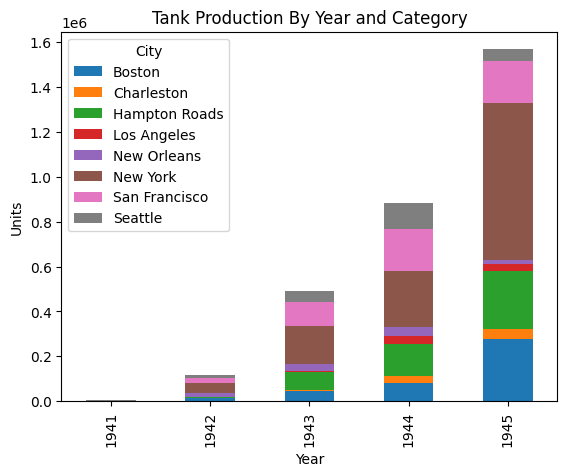

In [83]:
agg_tips = dfl.assign(Year= lambda x: x['Date'].dt.year).sort_values(by='City').groupby(['Year','City'])['value'].sum().unstack().fillna(0)
agg_tips.plot(kind='bar', stacked=True)
plt.title('Tank Production By Year and Category')
plt.xticks(rotation=90, ha='center')
plt.ylabel('Units')
print(agg_tips)